<a href="https://colab.research.google.com/github/LeelaNandhaKishore1511/RL-Lab-Sem-5/blob/main/RL_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym,gym_bandits
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
env=gym.make("MultiarmedBandits-v0")
data = pd.read_csv('Ads_CTR_Optimisation.csv')

The best performing ad is Ad 5


Text(0.5, 1.0, 'Distribution of Selected Ads (Epsilon-Greedy)')

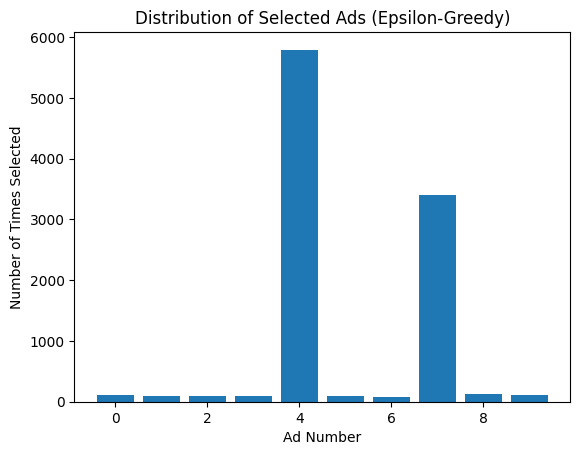

In [ ]:
num_reward = data.shape[0]
num_ads = data.shape[1]
selected_ads = []

ad_counts = np.zeros(num_ads)
ad_rewards = np.zeros(num_ads)
epsilon = 0.1
total_rounds = data.shape[0]
for round_num in range(total_rounds):
    if random.random() < epsilon:
        chosen_ad = random.randrange(num_ads)
    else:
        average_rewards = np.divide(ad_rewards, ad_counts, out=np.zeros_like(ad_rewards, dtype=float), where=ad_counts != 0)
        chosen_ad = np.argmax(average_rewards)

    selected_ads.append(chosen_ad)

    reward = data.values[round_num, chosen_ad]

    ad_counts[chosen_ad] += 1
    ad_rewards[chosen_ad] += reward


best_ad = np.argmax(ad_rewards) + 1
print(f"The best performing ad is Ad {best_ad}")

plt.hist(selected_ads, bins=range(num_ads + 1), align='left', rwidth=0.8)
plt.xlabel("Ad Number")
plt.ylabel("Number of Times Selected")
plt.title("Distribution of Selected Ads (Epsilon-Greedy)")

In [ ]:
envs = gym.envs.registry
total_envs = len(envs)
print(f"Total number of environments: {total_envs}")
env_names = sorted([env_spec.id for env_spec in envs.values()]) # Iterate through the values of the registry dictionary
for i in env_names:
  print(i)

Total number of environments: 45
Acrobot-v1
Ant-v2
Ant-v3
Ant-v4
BipedalWalker-v3
BipedalWalkerHardcore-v3
Blackjack-v1
CarRacing-v2
CartPole-v0
CartPole-v1
CliffWalking-v0
FrozenLake-v1
FrozenLake8x8-v1
HalfCheetah-v2
HalfCheetah-v3
HalfCheetah-v4
Hopper-v2
Hopper-v3
Hopper-v4
Humanoid-v2
Humanoid-v3
Humanoid-v4
HumanoidStandup-v2
HumanoidStandup-v4
InvertedDoublePendulum-v2
InvertedDoublePendulum-v4
InvertedPendulum-v2
InvertedPendulum-v4
LunarLander-v2
LunarLanderContinuous-v2
MountainCar-v0
MountainCarContinuous-v0
MultiarmedBandits-v0
Pendulum-v1
Pusher-v2
Pusher-v4
Reacher-v2
Reacher-v4
Swimmer-v2
Swimmer-v3
Swimmer-v4
Taxi-v3
Walker2d-v2
Walker2d-v3
Walker2d-v4


In [ ]:
#CartPole Environment
env = gym.make("CartPole-v0")
state, info = env.reset() # Unpack state and info

print("Action Space:", env.action_space)
print("Observation Space:", env.observation_space)

def describe_state(state):
  # Add a check here as well
  if not isinstance(state, np.ndarray) or state.shape != (4,):
      print(f"Unexpected state format in describe_state: Type - {type(state)}, Shape - {getattr(state, 'shape', 'N/A')}")
      return # Exit the function if state is not the expected format

  cart_position, cart_velocity, pole_angle, pole_velocity = state
  print(f"Cart Position: {cart_position}")
  print(f"Cart Velocity: {cart_velocity}")
  print(f"Pole Angle: {pole_angle}")
  print(f"Pole Velocity: {pole_velocity}")

print("Initial State:")
describe_state(state)

actions = {0: "Move Left", 1: "Move Right"}
for action in actions:
    print(f"Action {action}: {actions[action]}")

num_steps = 5
print("\nSimulating a few steps:")
for step in range(num_steps):
    action = env.action_space.sample()  # Sample an action
    next_state, reward, done, truncated, info = env.step(action) # Take the step with the sampled action

    print(f"\nStep {step + 1}:")
    print(f"Action taken: {actions[action]}") # Print the actual action taken
    print("Next State:")
    # Add print statements to diagnose next_state
    print(f"Type of next_state: {type(next_state)}")
    try:
        print(f"Shape of next_state: {next_state.shape}")
    except AttributeError:
        print("next_state does not have a shape attribute")
    print(f"Value of next_state: {next_state}")


    describe_state(next_state) # Pass the observation (next_state) to describe_state
    print(f"Reward: {reward}")
    print(f"Done: {done}")
    # print(f"Truncated: {truncated}") # Optional: Print truncated

env.close()

Action Space: Discrete(2)
Observation Space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Initial State:
Cart Position: 0.004315102007240057
Cart Velocity: -0.020276103168725967
Pole Angle: -0.02446138486266136
Pole Velocity: 0.01894913613796234
Action 0: Move Left
Action 1: Move Right

Simulating a few steps:

Step 1:
Action taken: Move Left
Next State:
Type of next_state: <class 'numpy.ndarray'>
Shape of next_state: (4,)
Value of next_state: [ 0.00390958 -0.21503887 -0.0240824   0.30381495]
Cart Position: 0.003909579943865538
Cart Velocity: -0.21503886580467224
Pole Angle: -0.024082401767373085
Pole Velocity: 0.30381494760513306
Reward: 1.0
Done: False

Step 2:
Action taken: Move Left
Next State:
Type of next_state: <class 'numpy.ndarray'>
Shape of next_state: (4,)
Value of next_state: [-3.9119757e-04 -4.0980947e-01 -1.8006103e-02  5.8880663e-01]
Cart Position: -0.0003911975654773414
Cart 

/usr/local/lib/python3.11/dist-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [ ]:
import gymnasium as gym
import numpy as np

env = gym.make("FrozenLake-v1", is_slippery=False)
observation, info = env.reset()

print("Action Space:", env.action_space)
print("Observation Space:", env.observation_space)

def describe_state(observation, map_size=4):
    if not isinstance(observation, int):
        print(f"Unexpected observation format in describe_state: Type - {type(observation)}, Value - {observation}")
        return

    row = observation // map_size
    col = observation % map_size

    grid = [
        "SFFF",
        "FHFH",
        "FFFH",
        "HFFG"
    ]

    current_cell_type = grid[row][col]

    print(f"Current Position (Observation): {observation}")
    print(f"Current Row: {row}, Current Column: {col}")
    print(f"Current Cell Type: {current_cell_type}")
    print(f"Grid Size: {map_size}x{map_size}")


print("\nInitial State:")
describe_state(observation)

actions = {0: "Left", 1: "Down", 2: "Right", 3: "Up"}
for action_id in actions:
    print(f"Action {action_id}: {actions[action_id]}")


num_steps = 5
print("\nSimulating a few steps:")
for step in range(num_steps):
    action = env.action_space.sample()
    next_observation, reward, terminated, truncated, info = env.step(action)

    print(f"\nStep {step + 1}:")
    print(f"Action taken: {actions[action]}")
    print("Next State (Observation):")
    print(f"Type of next_observation: {type(next_observation)}")
    print(f"Value of next_observation: {next_observation}")


    describe_state(next_observation)
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}")
    print(f"Truncated: {truncated}")

    if terminated or truncated:
        print("Episode ended.")
        observation, info = env.reset()  # Reset for a new episode if done or truncated
        print("\nNew Episode Started. Initial State:")
        describe_state(observation)


env.close()



Action Space: Discrete(4)
Observation Space: Discrete(16)

Initial State:
Current Position (Observation): 0
Current Row: 0, Current Column: 0
Current Cell Type: S
Grid Size: 4x4
Action 0: Left
Action 1: Down
Action 2: Right
Action 3: Up

Simulating a few steps:

Step 1:
Action taken: Left
Next State (Observation):
Type of next_observation: <class 'int'>
Value of next_observation: 0
Current Position (Observation): 0
Current Row: 0, Current Column: 0
Current Cell Type: S
Grid Size: 4x4
Reward: 0.0
Terminated: False
Truncated: False

Step 2:
Action taken: Right
Next State (Observation):
Type of next_observation: <class 'int'>
Value of next_observation: 1
Current Position (Observation): 1
Current Row: 0, Current Column: 1
Current Cell Type: F
Grid Size: 4x4
Reward: 0.0
Terminated: False
Truncated: False

Step 3:
Action taken: Up
Next State (Observation):
Type of next_observation: <class 'int'>
Value of next_observation: 1
Current Position (Observation): 1
Current Row: 0, Current Column: 1


In [ ]:
import gymnasium as gym
import numpy as np

# Create the Mountain Car environment
env = gym.make("MountainCar-v0")

# Reset the environment and get the initial observation (state) and info
# The observation for MountainCar-v0 is a NumPy array with two elements: [position, velocity]
observation, info = env.reset()

print("Action Space:", env.action_space)  # Discrete(3): 0=Left, 1=Nothing, 2=Right
print("Observation Space:", env.observation_space) # Box(2,) - Continuous space for position and velocity


def describe_state(observation):
    """
    Describes the Mountain Car state (observation).
    The observation is a NumPy array [position, velocity].
    """
    # Check for the expected format: a NumPy array with two elements
    if not isinstance(observation, np.ndarray) or observation.shape != (2,):
        print(f"Unexpected observation format in describe_state: Type - {type(observation)}, Shape - {getattr(observation, 'shape', 'N/A')}")
        return

    position, velocity = observation
    print(f"Car Position: {position:.4f}")  # Format to 4 decimal places for readability
    print(f"Car Velocity: {velocity:.4f}")


print("\nInitial State:")
describe_state(observation)

# Define actions for Mountain Car
actions = {0: "Accelerate Left", 1: "Do Nothing", 2: "Accelerate Right"}
for action_id in actions:
    print(f"Action {action_id}: {actions[action_id]}")


num_steps = 10  # Simulate a few steps
print("\nSimulating a few steps:")
for step in range(num_steps):
    action = env.action_space.sample()  # Sample a random action (0-2)

    # Take a step in the environment
    next_observation, reward, terminated, truncated, info = env.step(action)

    print(f"\nStep {step + 1}:")
    print(f"Action taken: {actions[action]}")
    print("Next State (Observation):")
    describe_state(next_observation)
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}")
    print(f"Truncated: {truncated}")

    if terminated or truncated:
        print("Episode ended.")
        observation, info = env.reset()  # Reset for a new episode if done or truncated
        print("\nNew Episode Started. Initial State:")
        describe_state(observation)


env.close()



Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

Initial State:
Car Position: -0.4060
Car Velocity: 0.0000
Action 0: Accelerate Left
Action 1: Do Nothing
Action 2: Accelerate Right

Simulating a few steps:

Step 1:
Action taken: Accelerate Right
Next State (Observation):
Car Position: -0.4059
Car Velocity: 0.0001
Reward: -1.0
Terminated: False
Truncated: False

Step 2:
Action taken: Do Nothing
Next State (Observation):
Car Position: -0.4066
Car Velocity: -0.0007
Reward: -1.0
Terminated: False
Truncated: False

Step 3:
Action taken: Accelerate Right
Next State (Observation):
Car Position: -0.4072
Car Velocity: -0.0006
Reward: -1.0
Terminated: False
Truncated: False

Step 4:
Action taken: Accelerate Right
Next State (Observation):
Car Position: -0.4076
Car Velocity: -0.0004
Reward: -1.0
Terminated: False
Truncated: False

Step 5:
Action taken: Accelerate Left
Next State (Observation):
Car Position: -0.4099
Car Velocity: -0.0023
Reward: -1.0
Ter

In [ ]:
import gymnasium as gym
import numpy as np

# CreateCreate the Blackjack environment
# You can set 'natural' to True for an additional reward for a natural blackjack.
# 'sab' (Simplified American Blackjack) uses different rules.
env = gym.make("Blackjack-v1", natural=True, sab=False)

# Reset the environment to get the initial observation and info
observation, info = env.reset()

print("Action Space:", env.action_space)  # Discrete(2): 0=Stick, 1=Hit
print("Observation Space:", env.observation_space) # Tuple(Discrete(32), Discrete(11), Discrete(2))


def describe_state(observation):
    """
    Describes the Blackjack state (observation).
    The observation is a 3-tuple: (player_current_sum, dealer_showing_card, usable_ace)
    """
    # Verify the observation format
    if not isinstance(observation, tuple) or len(observation) != 3:
        print(f"Unexpected observation format in describe_state: Type - {type(observation)}, Value - {observation}")
        return

    player_sum, dealer_card, usable_ace = observation
    print(f"Player's Current Sum: {player_sum}")
    print(f"Dealer's Showing Card: {dealer_card} (1=Ace, 10=Face Cards)")
    print(f"Usable Ace: {'Yes' if usable_ace else 'No'}") # 0 or 1 for no/yes

print("\nInitial State:")
describe_state(observation)

# Define actions for Blackjack
actions = {0: "Stick (Take no more cards)", 1: "Hit (Take another card)"}
for action_id in actions:
    print(f"Action {action_id}: {actions[action_id]}")


num_steps = 5  # Simulate a few steps
print("\nSimulating a few steps (until episode ends):")
for step in range(num_steps):
    action = env.action_space.sample()  # Sample a random action (0 or 1)

    # Take a step in the environment
    # next_observation is the new game state
    # reward is +1 for win, 0 for draw, -1 for loss (or +1.5 for natural blackjack win)
    # terminated is True if the game is over (player busts or sticks)
    # truncated is False for this environment (no time limits)
    next_observation, reward, terminated, truncated, info = env.step(action)

    print(f"\nStep {step + 1}:")
    print(f"Action taken: {actions[action]}")
    print("Next State (Observation):")
    describe_state(next_observation)
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}") # Indicates if the game has ended
    # print(f"Truncated: {truncated}") # Blackjack environment does not use truncation

    if terminated: # If the episode is over (game ended)
        print("Game Over. Starting a new game.")
        observation, info = env.reset()  # Reset for a new game
        print("\nNew Game Started. Initial State:")
        describe_state(observation)


env.close()



Action Space: Discrete(2)
Observation Space: Tuple(Discrete(32), Discrete(11), Discrete(2))

Initial State:
Player's Current Sum: 16
Dealer's Showing Card: 5 (1=Ace, 10=Face Cards)
Usable Ace: No
Action 0: Stick (Take no more cards)
Action 1: Hit (Take another card)

Simulating a few steps (until episode ends):

Step 1:
Action taken: Stick (Take no more cards)
Next State (Observation):
Player's Current Sum: 16
Dealer's Showing Card: 5 (1=Ace, 10=Face Cards)
Usable Ace: No
Reward: 1.0
Terminated: True
Game Over. Starting a new game.

New Game Started. Initial State:
Player's Current Sum: 12
Dealer's Showing Card: 1 (1=Ace, 10=Face Cards)
Usable Ace: Yes

Step 2:
Action taken: Hit (Take another card)
Next State (Observation):
Player's Current Sum: 19
Dealer's Showing Card: 1 (1=Ace, 10=Face Cards)
Usable Ace: Yes
Reward: 0.0
Terminated: False

Step 3:
Action taken: Hit (Take another card)
Next State (Observation):
Player's Current Sum: 16
Dealer's Showing Card: 1 (1=Ace, 10=Face Cards)
U

In [ ]:
import gymnasium as gym
import numpy as np

# Create the Taxi environment
env = gym.make("Taxi-v3")

# Reset the environment and get the initial observation (state) and info
observation, info = env.reset()

print("Action Space:", env.action_space)  # Discrete(6) - for 6 actions
print("Observation Space:", env.observation_space) # Discrete(500) - for 500 possible states


def describe_state(observation):
    """
    Decodes the Taxi state (observation) into its components and describes it.
    The observation is a single integer that encodes (taxi_row, taxi_col, passenger_location, destination).
    """
    # Access the unwrapped environment to use the decode method
    taxi_row, taxi_col, passenger_location, destination = env.unwrapped.decode(observation)

    passenger_locations = {
        0: "Red (R)",
        1: "Green (G)",
        2: "Yellow (Y)",
        3: "Blue (B)",
        4: "in Taxi"
    }

    destination_locations = {
        0: "Red (R)",
        1: "Green (G)",
        2: "Yellow (Y)",
        3: "Blue (B)"
    }

    print(f"Observation (Encoded State): {observation}")
    print(f"Taxi Position: (row={taxi_row}, col={taxi_col})")
    print(f"Passenger Location: {passenger_locations[passenger_location]}")
    print(f"Destination: {destination_locations[destination]}")

print("\nInitial State:")
describe_state(observation)

# Define actions for Taxi-v3
actions = {
    0: "Move South",
    1: "Move North",
    2: "Move East",
    3: "Move West",
    4: "Pick up passenger",
    5: "Drop off passenger"
}
for action_id in actions:
    print(f"Action {action_id}: {actions[action_id]}")


num_steps = 10  # Simulate a few steps
print("\nSimulating a few steps:")
for step in range(num_steps):
    action = env.action_space.sample()  # Sample a random action

    # Take a step in the environment
    next_observation, reward, terminated, truncated, info = env.step(action)

    print(f"\nStep {step + 1}:")
    print(f"Action taken: {actions[action]}")
    print("Next State (Observation):")
    describe_state(next_observation)
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}") # True if passenger is dropped off
    print(f"Truncated: {truncated}") # True if max steps reached (default: 200)

    if terminated or truncated:
        print("Episode ended. Resetting environment.")
        observation, info = env.reset()  # Reset for a new episode
        print("\nNew Episode Started. Initial State:")
        describe_state(observation)


env.close()

Action Space: Discrete(6)
Observation Space: Discrete(500)

Initial State:
Observation (Encoded State): 268
Taxi Position: (row=2, col=3)
Passenger Location: Yellow (Y)
Destination: Red (R)
Action 0: Move South
Action 1: Move North
Action 2: Move East
Action 3: Move West
Action 4: Pick up passenger
Action 5: Drop off passenger

Simulating a few steps:

Step 1:
Action taken: Move East
Next State (Observation):
Observation (Encoded State): 288
Taxi Position: (row=2, col=4)
Passenger Location: Yellow (Y)
Destination: Red (R)
Reward: -1
Terminated: False
Truncated: False

Step 2:
Action taken: Drop off passenger
Next State (Observation):
Observation (Encoded State): 288
Taxi Position: (row=2, col=4)
Passenger Location: Yellow (Y)
Destination: Red (R)
Reward: -10
Terminated: False
Truncated: False

Step 3:
Action taken: Drop off passenger
Next State (Observation):
Observation (Encoded State): 288
Taxi Position: (row=2, col=4)
Passenger Location: Yellow (Y)
Destination: Red (R)
Reward: -10
T

In [ ]:
import gymnasium as gym
import numpy as np

# Create the CliffWalking environment
env = gym.make("CliffWalking-v1")

# Reset the environment and get the initial observation (state) and info
observation, info = env.reset()

print("Action Space:", env.action_space)  # Discrete(4) - for 4 actions
print("Observation Space:", env.observation_space) # Discrete(48) - for 48 possible states


def describe_state(observation, num_cols=12):
    """
    Decodes the CliffWalking state (observation) into its row and column.
    The observation is a single integer (0-47) representing the agent's position.
    """
    if not isinstance(observation, int):
        print(f"Unexpected observation format in describe_state: Type - {type(observation)}, Value - {observation}")
        return

    row = observation // num_cols
    col = observation % num_cols

    # Represent the grid for a clearer understanding
    grid_representation = [
        "FFFFFFFFFFFF",
        "FFFFFFFFFFFF",
        "FFFFFFFFFFFF",
        "SCCCCCCCCCCCG"
    ]
    # Adjust for 0-indexed rows
    grid_row = grid_representation[row]
    cell_type = grid_row[col] if 0 <= col < len(grid_row) else "Out of Bounds"


    print(f"Observation (Encoded State): {observation}")
    print(f"Agent Position: (row={row}, col={col})")
    print(f"Cell Type: {cell_type} (S=Start, F=Frozen/Safe, C=Cliff, G=Goal)")

print("\nInitial State:")
describe_state(observation)

# Define actions for CliffWalking
actions = {0: "Up", 1: "Right", 2: "Down", 3: "Left"}
for action_id in actions:
    print(f"Action {action_id}: {actions[action_id]}")


num_steps = 15  # Simulate a few steps
print("\nSimulating a few steps:")
for step in range(num_steps):
    action = env.action_space.sample()  # Sample a random action

    # Take a step in the environment
    # next_observation is the agent's new position
    # reward is -1 (or -100 for cliff)
    # terminated is True if goal reached
    # truncated is False (no time limit by default)
    next_observation, reward, terminated, truncated, info = env.step(action)

    print(f"\nStep {step + 1}:")
    print(f"Action taken: {actions[action]}")
    print("Next State (Observation):")
    describe_state(next_observation)
    print(f"Reward: {reward}")
    print(f"Terminated: {terminated}")
    # print(f"Truncated: {truncated}") # CliffWalking environment does not use truncation

    if terminated:
        print("Goal reached! Episode ended. Resetting environment.")
        observation, info = env.reset()
        print("\nNew Episode Started. Initial State:")
        describe_state(observation)


env.close()



Action Space: Discrete(4)
Observation Space: Discrete(48)

Initial State:
Observation (Encoded State): 36
Agent Position: (row=3, col=0)
Cell Type: S (S=Start, F=Frozen/Safe, C=Cliff, G=Goal)
Action 0: Up
Action 1: Right
Action 2: Down
Action 3: Left

Simulating a few steps:

Step 1:
Action taken: Left
Next State (Observation):
Observation (Encoded State): 36
Agent Position: (row=3, col=0)
Cell Type: S (S=Start, F=Frozen/Safe, C=Cliff, G=Goal)
Reward: -1
Terminated: False

Step 2:
Action taken: Right
Next State (Observation):
Observation (Encoded State): 36
Agent Position: (row=3, col=0)
Cell Type: S (S=Start, F=Frozen/Safe, C=Cliff, G=Goal)
Reward: -100
Terminated: False

Step 3:
Action taken: Up
Next State (Observation):
Observation (Encoded State): 24
Agent Position: (row=2, col=0)
Cell Type: F (S=Start, F=Frozen/Safe, C=Cliff, G=Goal)
Reward: -1
Terminated: False

Step 4:
Action taken: Left
Next State (Observation):
Observation (Encoded State): 24
Agent Position: (row=2, col=0)
Cel